In [44]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
titanic = sns.load_dataset("titanic")

In [6]:
# From the “titanic” dataset built into Seaborn (sns.load_dataset(“titanic”)), create a notebook, with Markdown separating sections for:
# Import anything you need for the lower cells, and set any defaults (I’ll run once)
# Missing Data Exploration
# Determine how much missing data there is for each variable, plotting it as a horizontal bar plot with seaborn
# Determine how much missing data there is for each passenger, and make a vertical bar plot according to the amount of missing data, separated by gender (there should be 3 bars, corresponding to “0”, “1”, and “2”
# Put both axes on the same figure
# Survival Exploration
# Create a pairplot for all numerical variables in the dataset (dropna for age), colored by survival
# Where age is not null, create a bar plot of survival and age grouping according to defined ranges of age for child, younger adult, adult, older adult (you can pick the age ranges yourself, but they should be clear in the code)
# 2 other things (up to you)
# Submit as another folder (assignment 4) in your git repository.  Try to include comments about what you are doing.



In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
missing_values = titanic.isnull().sum()
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['variable']
missing_values['variable'] = missing_values.index
missing_values

,count,variable
variable,,
survived,0,survived
pclass,0,pclass
sex,0,sex
age,177,age
sibsp,0,sibsp
parch,0,parch
fare,0,fare
embarked,2,embarked
class,0,class


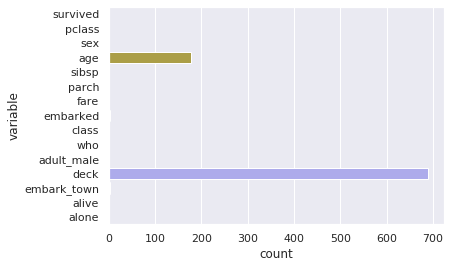

In [5]:
sns.barplot(y="variable",x="count",data=missing_values)

In [12]:
male_dataset = titanic[titanic.who == "man"]
man_row_missing_values = male_dataset.isnull().sum(axis=1)
man_row_missing_values = man_row_missing_values.to_frame()
#male_dataset['# of missing'] = row_missing_values
#row_missing_values = row_missing_values.sum(axis=1)
#type(row_missing_values)
#missing_values_0 = row_missing_values.count()
#row_missing_values
man_missing_values_0 = man_row_missing_values.groupby(0).size().to_frame()
man_missing_values_0.columns = ["male_count"]
man_missing_values_0
#man_missing_values_0 = man_missing_values_0.transpose()
man_missing_values_0

,male_count
0,
0,87
1,338
2,112


In [13]:
female_dataset = titanic[titanic.who == "woman"]
female_row_missing_values = female_dataset.isnull().sum(axis=1)
female_row_missing_values = female_row_missing_values.to_frame()
female_row_missing_values = female_row_missing_values.groupby(0).size().to_frame()
female_row_missing_values.columns = ["female_count"]
#female_row_missing_values = female_row_missing_values.transpose()
female_row_missing_values

,female_count
0,
0,82
1,141
2,48


In [29]:
row_missing_values = female_row_missing_values.merge(man_missing_values_0,left_index=True,right_index=True)
#row_missing_values = row_missing_values.transpose()
row_missing_values.index.names = ['# of missing']
row_missing_values['# of missing'] = row_missing_values.index
#row_missing_values.index.names = ['# of missing']

#row_missing_values = female_row_missing_values.merge(man_missing_values_0,left_index=True,right_index=True)
row_missing_values


,female_count,male_count,# of missing
# of missing,,,
0,82,87,0
1,141,338,1
2,48,112,2


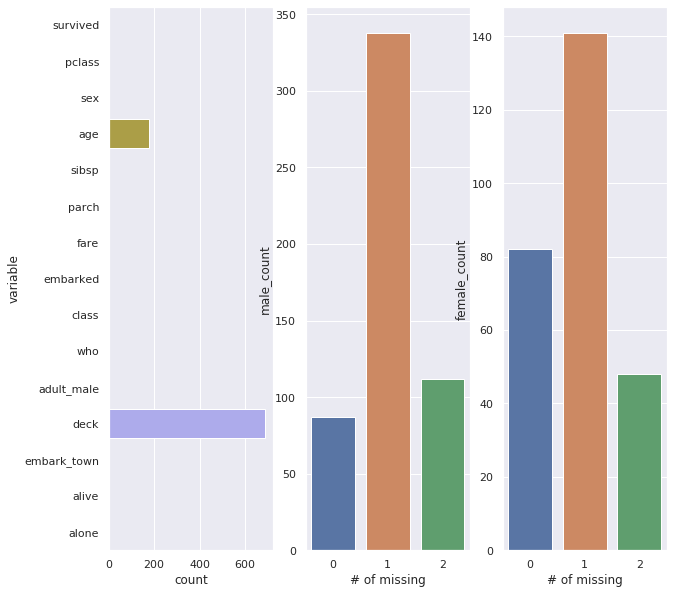

In [30]:
f, axes = plt.subplots(1, 3, figsize=(10, 10))
sns.barplot(y="variable",x="count",data=missing_values,ax=axes[0])
sns.barplot(y = "male_count",x="# of missing",data=row_missing_values,ax=axes[1])
sns.barplot(y = "female_count",x="# of missing",data=row_missing_values,ax=axes[2])

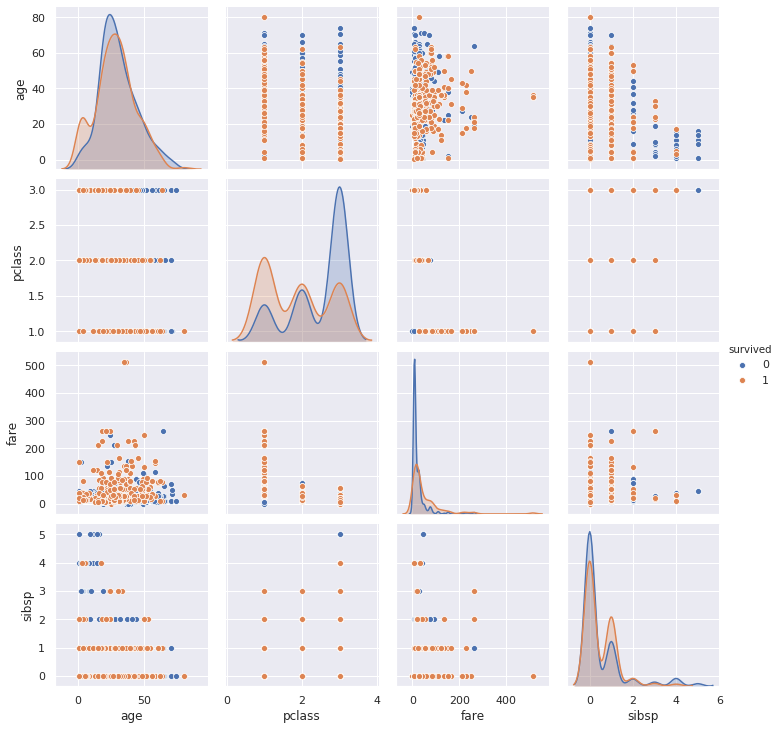

In [58]:
#titanic.head()
titanic2 = titanic[pd.notnull(titanic["age"])]
titanic2 = titanic2[["age","pclass","fare","sibsp","survived"]]
titanic2.head()
sns.pairplot(data =titanic2,hue ="survived")

/home/hl46161/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


AttributeError: 'Text' object has no attribute 'set_ylabel'

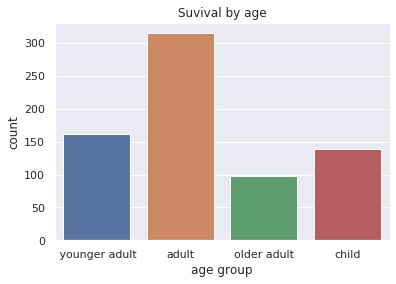

In [75]:
titanic3 =titanic2[["age","survived"]]
group = [titanic3.age.between(0,18),titanic3.age.between(19,25),titanic3.age.between(26,46),titanic3.age.between(47,100)]
names = ["child"," younger adult","adult","older adult"]
titanic3["age group"] = np.select(group,names)
ax2 = sns.countplot(x="age group",data =titanic3).set_title("Suvival by age")
#ax2.set_ylabel("# of survive")
#titanic3 = 

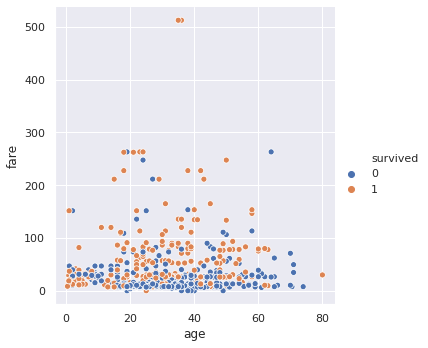

In [82]:
titanic2.head()
sns.relplot(y="fare",x="age",hue = "survived",data=titanic2)

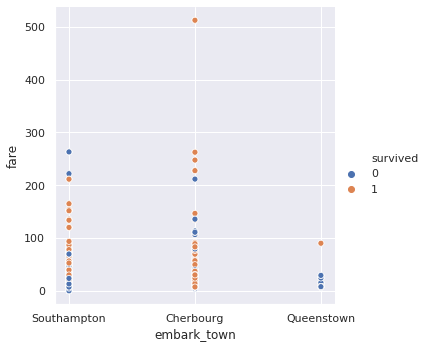

In [85]:
sns.relplot(x="embark_town",y="fare",hue = "survived",data=titanic)